In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's import the data.

In [2]:
path = os.path.join(os.getcwd(), 'data', 'ex2data1.txt')

In [5]:
data = pd.read_csv(path, header=None, names=['Exam 1 Score', 'Exam 2 Score', 'Admitted'])

In [6]:
data.head()

Exam 1 Score  Exam 2 Score  Admitted
0     34.623660     78.024693         0
1     30.286711     43.894998         0
2     35.847409     72.902198         0
3     60.182599     86.308552         1
4     79.032736     75.344376         1

In [7]:
data.describe()

Exam 1 Score  Exam 2 Score    Admitted
count    100.000000    100.000000  100.000000
mean      65.644274     66.221998    0.600000
std       19.458222     18.582783    0.492366
min       30.058822     30.603263    0.000000
25%       50.919511     48.179205    0.000000
50%       67.032988     67.682381    1.000000
75%       80.212529     79.360605    1.000000
max       99.827858     98.869436    1.000000

In [9]:
data.head()[data['Admitted'].isin([1])]

C:\Python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Exam 1 Score  Exam 2 Score  Admitted
3     60.182599     86.308552         1
4     79.032736     75.344376         1

In [10]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

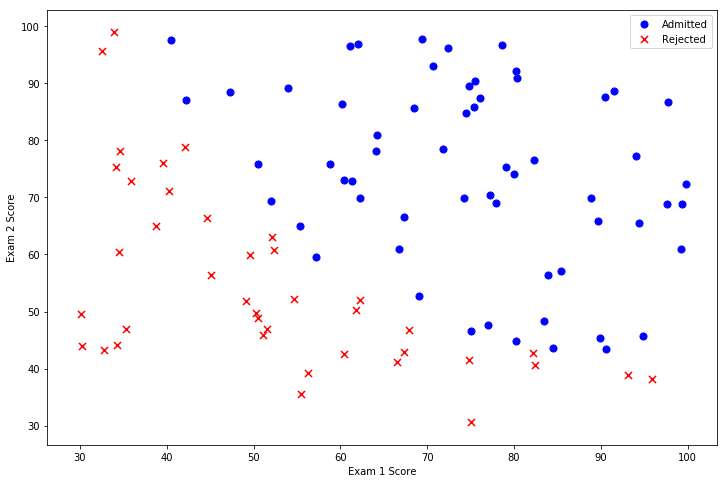

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1 Score'], positive['Exam 2 Score'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1 Score'], negative['Exam 2 Score'], s=50, c='r', marker='x', label='Rejected')

ax.legend()

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Now we write the sigmoid function $ \sigma(z) = \dfrac{1}{1 + e^{-z}} $

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Now we implement the cost function for Logistic Regression. Recall: $$ J(\theta) = \dfrac{1}{m}\sum_{i=1}^m \left[ -y^{(i)}\log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)})) \right] $$ and $$ \dfrac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} $$, while our hypothesis is $$ h_{\theta}(x) = \dfrac{1}{1 + e^{-\theta^T x}} $$

Let's also plot the sigmoid function.

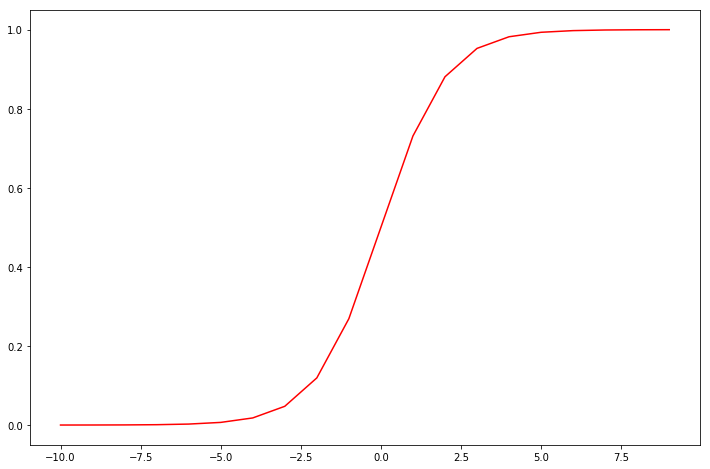

In [14]:
nums = np.arange(-10,10,step=1)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums),'r')

In [ ]:
def computeCost(X, y, theta):
    """
    Implement cost function for Logistic Regression.
    """
    inner = np.power((X*theta.T - y), 2)
    m = len(X) # since X is an m x n matrix.
    return np.sum(inner) / (2 * m)